Input Image:

In [2]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

input_image = Image.open("../input_images/WholeHouse.tif")
image_array = np.array(input_image)
height, width = image_array.shape

print(image_array)
print(f"Shape: {image_array.shape}")  #(height, width)

[[165 171 166 ... 138 141 131]
 [136 150 172 ... 127 128 125]
 [ 91 133 167 ... 122 122 123]
 ...
 [171 155 150 ... 146 148 144]
 [176 172 160 ... 147 146 140]
 [139 139 138 ... 140 139 139]]
Shape: (300, 800)


Save and Plot the results:

In [3]:
def show_results(output_array,output_image_name,input_image_array=input_image):
    Image.fromarray(output_array.astype(np.uint8)).save("../output_images/"+output_image_name+"_image.bmp")
    plt.figure(figsize=(10, 5))
    # Original image
    plt.subplot(1, 2, 1)
    plt.imshow(np.array(input_image_array), cmap="gray")
    plt.title("Original Image", fontsize=16)
    plt.axis("off")
    # detector Image
    plt.subplot(1, 2, 2)
    plt.imshow(output_array, cmap="gray")
    plt.title(output_image_name+" Edge Detector", fontsize=16)
    plt.axis("off")
    plt.tight_layout()
    plt.show()

High and Low Pass Filtering Algorithm:

In [4]:
def apply_filter(image_array,mask):
    output_array= np.zeros_like(image_array)
    height, width = image_array.shape
    for i in range(1,height-1):
        for j in range(1,width-1):
            region = image_array[
                i-1:i+2,
                j-1:j+2]
            conv_value= np.sum(region*mask)
            if conv_value > 255:
                output_array[i,j]= 255
            elif conv_value < 0:
                output_array[i,j]= 0
            else:
                output_array[i,j]= conv_value
    return output_array

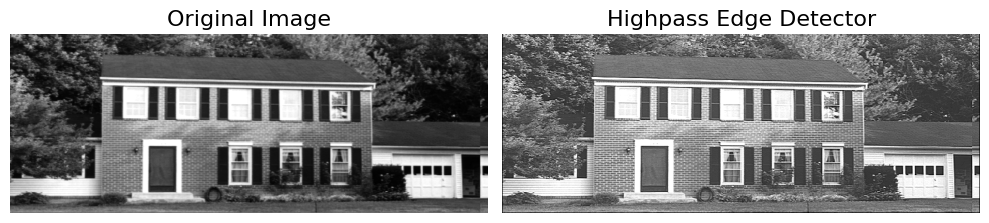

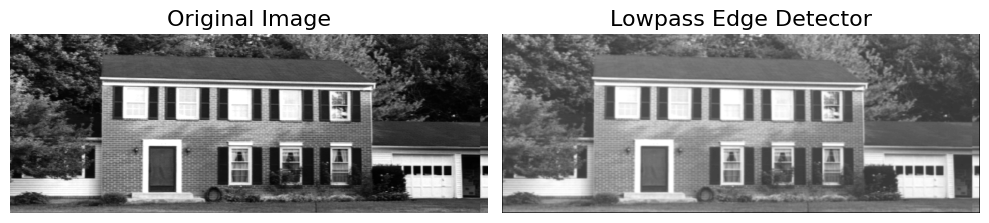

In [5]:
high_pass_mask = np.array([
    [0,-1,0],
    [-1,5,-1],
    [0,-1,0]
    ])

low_pass_mask =(1/6)* np.array([
    [0,1,0],
    [1,2,1],
    [0,1,0]
    ])

show_results(output_array=apply_filter(image_array,high_pass_mask), output_image_name="Highpass")
show_results(output_array=apply_filter(image_array,low_pass_mask), output_image_name="Lowpass")

Median Filter Algorithm:

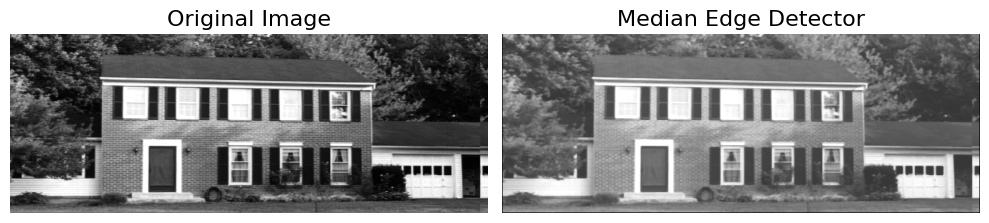

In [6]:
def median_filter(image_array):
    output_array= np.zeros_like(image_array)
    height, width = image_array.shape
    for i in range(1,height-1):
        for j in range(1,width-1):
            region = image_array[
                i-1:i+2,
                j-1:j+2]
            median_value= np.median(region)
            output_array[i,j]=median_value
    return output_array

show_results(output_array=median_filter(image_array), output_image_name="Median")